Merging Dataframes

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#read in excel file
fantasy_df = pd.read_excel("Historical_Fantasy_Data_v2.xlsx", sheet = "Summary" )
fantasy_df.head()

,Unnamed: 0,Player,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,Russell Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9,20.9,20.9,21.5,17.5,22.4
1,NaN,Todd Gurley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2,11.0,23.4
2,NaN,Cam Newton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.2,21.0,18.6,18.6,24.9,17.9,19.7
3,NaN,Tom Brady,8.9,14.2,14.9,16.5,14.5,24.9,0.0,18.9,18.9,23.6,21.8,17.9,17.9,22.0,21.7,19.0
4,NaN,Alex Smith,0.0,0.0,0.0,0.0,11.3,5.6,0.0,13.2,13.2,13.4,8.0,15.1,15.1,17.4,15.5,20.0


In [6]:
#removed extra columns found in first look
fantasy_df.drop("Unnamed: 0", axis = 1, inplace = True)
fantasy_df.head()

,Player,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Russell Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9,20.9,20.9,21.5,17.5,22.4
1,Todd Gurley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2,11.0,23.4
2,Cam Newton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.2,21.0,18.6,18.6,24.9,17.9,19.7
3,Tom Brady,8.9,14.2,14.9,16.5,14.5,24.9,0.0,18.9,18.9,23.6,21.8,17.9,17.9,22.0,21.7,19.0
4,Alex Smith,0.0,0.0,0.0,0.0,11.3,5.6,0.0,13.2,13.2,13.4,8.0,15.1,15.1,17.4,15.5,20.0


In [7]:
fantasy_df.set_index("Player")

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Player,,,,,,,,,,,,,,,,
Russell Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9,20.9,20.9,21.5,17.5,22.4
Todd Gurley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2,11.0,23.4
Cam Newton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.2,21.0,18.6,18.6,24.9,17.9,19.7
Tom Brady,8.9,14.2,14.9,16.5,14.5,24.9,0.0,18.9,18.9,23.6,21.8,17.9,17.9,22.0,21.7,19.0
Alex Smith,0.0,0.0,0.0,0.0,11.3,5.6,0.0,13.2,13.2,13.4,8.0,15.1,15.1,17.4,15.5,20.0
Le'Veon Bell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.6,20.6,16.5,23.3,19.9
Kirk Cousins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.2,16.2,19.0,19.5,18.2
Carson Wentz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.2,22.2
Matthew Stafford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2,17.2,22.5,18.3,16.5,16.5,19.0,18.1,17.7


In [8]:
kenny_britt = pd.DataFrame(fantasy_df.set_index("Player").loc["Kenny Britt"].transpose())
kenny_britt

,Kenny Britt
2002,0.0
2003,0.0
2004,0.0
2005,0.0
2006,0.0
2007,0.0
2008,0.0
2009,12.7
2010,12.7
2011,17.8


In [10]:
#plt.scatter(kenny_britt.index, kenny_britt)
#plt.show()

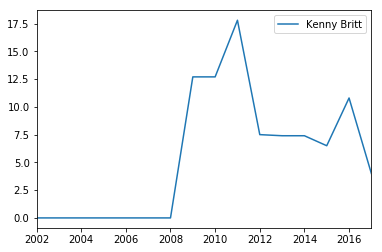

In [11]:
kenny_britt.plot()
plt.show()

In [12]:
#aldon_smith = pd.DataFrame(fantasy_df.set_index("Player").loc["Aldon Smith"].transpose())
#no data in fantasy data

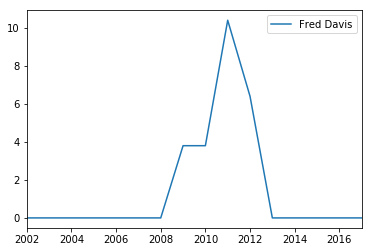

In [13]:
fred_davis = pd.DataFrame(fantasy_df.set_index("Player").loc["Fred Davis"].transpose())
fred_davis.plot()
plt.show()

In [14]:
#leroy_hill = pd.DataFrame(fantasy_df.set_index("Player").loc["Leroy Hill"].transpose())
#no data in fantasy data

In [15]:
#adam_jones = pd.DataFrame(fantasy_df.set_index("Player").loc["Adam Jones"].transpose())
#no data

In [16]:
#johnny_jolly = pd.DataFrame(fantasy_df.set_index("Player").loc["Johnny Jolly"].transpose())
#no data

In [ ]:
fred_davis = pd.DataFrame(fantasy_df.set_index("Player").loc["Fred Davis"].transpose())
fred_davis.plot()
plt.show()